<a href="https://colab.research.google.com/github/fcm1006/CUHK/blob/GISM/GeoSpatialBigData%20/%20Assignment_3_FEY_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Open question] Find the center area of Shanghai

Suppose you need to identify the **center area** of Shanghai by using Mobike data.
You can apply any methods you like to work out the result then plot it in folium with basemap(Gaode)


Here is the full dataset of Mobike:
https://github.com/gyshion/tutorial/raw/main/mobike_shanghai1.csv


Tips:

1. Generate clusters for shared bike data
2. Create nertwork from shared bike data
3. Use network analysis on the shared bike network
4. Identify the center area (color the center area in red/blue(as you like))
5. Explain the flow and the result





# 1. Clustering

## 1.1 Import data and modules

Different clustering algorithm

https://scikit-learn.org/stable/modules/clustering.html

In [2]:
!pip install sklearn # an important machine learning package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=68d749a96627b888006cc159567b21b607784c85c339c2dd5423c1ee6b35b809
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [3]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

In [4]:
# load a mobike data in Shanghai
mobike_df = pd.read_csv('https://github.com/gyshion/tutorial/raw/main/mobike_shanghai1.csv')
mobike_df

orderid  bikeid  userid        start_time  start_location_x  \
0         78387  158357   10080  2016-08-20 06:57         121.34860   
1        891333   92776    6605  2016-08-29 19:09         121.50808   
2       1106623  152045    8876  2016-08-13 16:17         121.38256   
3       1389484  196259   10648  2016-08-23 21:34         121.48472   
4        188537   78208   11735  2016-08-16 07:32         121.40655   
...         ...     ...     ...               ...               ...   
102356  1479550  214335    1423  2016-08-28 18:03         121.47716   
102357  1478273  160487    3067  2016-08-14 20:22         121.32073   
102358   367733  179530   12746  2016-08-27 09:54         121.39125   
102359    64915  167419     837  2016-08-20 06:04         121.51414   
102360   326987   63172    2547  2016-08-09 10:51         121.52049   

        start_location_y          end_time  end_location_x  end_location_y  \
0               31.38844  2016-08-20 07:04       121.35731        31.38846   
1               31.27989  2016-08-29 19:31       121.48925        31.27156   
2               31.25409  2016-08-13 16:36       121.40445        31.24789   
3               31.31914  2016-08-23 21:43       121.47078        31.32401   
4               31.29142  2016-08-16 07:41       121.41701        31.28734   
...                  ...               ...             ...             ...   
102356          31.29627  2016-08-28 18:09       121.48110        31.30321   
102357          31.23861  2016-08-14 20:28       121.31166        31.23460   
102358          31.30636  2016-08-27 10:06       121.39788        31.30559   
102359          31.26882  2016-08-20 06:10       121.50941        31.27181   
102360          31.26095  2016-08-09 11:01       121.51755        31.27385   

        track  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
102356    NaN  
102357    NaN  
102358    NaN  
102359    NaN  
102360    NaN  

[102361 rows x 10 columns]

## 1.2 Plot base map and OD data

In [5]:
# plot in map
!pip install folium
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Plot Shanghai as basemap
sh_lat = 31.22 
sh_lng = 121.46
gaode = 'http://wprd03.is.autonavi.com/appmaptile?style=7&x={x}&y={y}&z={z}' 
map_sh = folium.Map(location=[sh_lat,sh_lng],tiles=gaode, attr = 'basemap')
map_sh

In [7]:
# Plot 1% of the Origin-destination line from mobike data
for index, row in mobike_df.iterrows():
    if index%100 == 0:
    #if index%10 == 0:  #10% OD data
        OD = [
            [row['start_location_y'],row['start_location_x']],
            [row['end_location_y'],row['end_location_x']]]
        
        folium.PolyLine(OD, color='red').add_to(map_sh)
map_sh

In [8]:
# stack the origin points with destination points
new_ll = []

for index, row in mobike_df.iterrows():
    new_ll.append([row['start_location_y'],row['start_location_x']])
    new_ll.append([row['end_location_y'],row['end_location_x']])

all_pt =pd.DataFrame(data = new_ll, columns = ["y", "x"]) 

# #just plot first 5 rows
all_pt.head(5)

y          x
0  31.38844  121.34860
1  31.38846  121.35731
2  31.27989  121.50808
3  31.27156  121.48925
4  31.25409  121.38256

## 1.3 Generate clusters using K-Means method

In [9]:
# define your parameters, like the radius of cluster
kmeans_mobike = KMeans(n_clusters=10, # choose number of clusters
                       random_state=0).fit(all_pt[['y','x']]) # train the model

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
predict_mobike = kmeans_mobike.fit_predict(all_pt[['y','x']]) # predict by the model
all_pt['label'] = predict_mobike

all_pt

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


y          x  label
0       31.38844  121.34860      2
1       31.38846  121.35731      2
2       31.27989  121.50808      1
3       31.27156  121.48925      4
4       31.25409  121.38256      3
...          ...        ...    ...
204717  31.30559  121.39788      2
204718  31.26882  121.51414      1
204719  31.27181  121.50941      4
204720  31.26095  121.52049      1
204721  31.27385  121.51755      1

[204722 rows x 3 columns]

In [11]:
# assign color for different labels
import random
def random_color(seed):
    random.seed(seed+10)
    return "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

print(random_color(4435)) # return the same color code for same seed

#2FB3E3


In [12]:
# check how many clusters we have
np.unique(predict_mobike)

# totally 10 clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [13]:
for index, row in all_pt.iterrows():
    if row['label']>=0:
      # you can modify your seed percentage
      if random.random()<0.02: # only 2%
        folium.CircleMarker(
            [row['y'],row['x']],
            color = random_color(row['label']),
            radius=3,
            fill=True
        ).add_to(map_sh)
map_sh

In [14]:
# assign the cluster to OD points
mobike_df['start_cluster'] = kmeans_mobike.fit_predict(mobike_df[['start_location_y','start_location_x']]) # predict by the model
mobike_df['end_cluster'] = kmeans_mobike.fit_predict(mobike_df[['end_location_y','end_location_x']]) # predict by the model
mobike_df

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


orderid  bikeid  userid        start_time  start_location_x  \
0         78387  158357   10080  2016-08-20 06:57         121.34860   
1        891333   92776    6605  2016-08-29 19:09         121.50808   
2       1106623  152045    8876  2016-08-13 16:17         121.38256   
3       1389484  196259   10648  2016-08-23 21:34         121.48472   
4        188537   78208   11735  2016-08-16 07:32         121.40655   
...         ...     ...     ...               ...               ...   
102356  1479550  214335    1423  2016-08-28 18:03         121.47716   
102357  1478273  160487    3067  2016-08-14 20:22         121.32073   
102358   367733  179530   12746  2016-08-27 09:54         121.39125   
102359    64915  167419     837  2016-08-20 06:04         121.51414   
102360   326987   63172    2547  2016-08-09 10:51         121.52049   

        start_location_y          end_time  end_location_x  end_location_y  \
0               31.38844  2016-08-20 07:04       121.35731        31.38846   
1               31.27989  2016-08-29 19:31       121.48925        31.27156   
2               31.25409  2016-08-13 16:36       121.40445        31.24789   
3               31.31914  2016-08-23 21:43       121.47078        31.32401   
4               31.29142  2016-08-16 07:41       121.41701        31.28734   
...                  ...               ...             ...             ...   
102356          31.29627  2016-08-28 18:09       121.48110        31.30321   
102357          31.23861  2016-08-14 20:28       121.31166        31.23460   
102358          31.30636  2016-08-27 10:06       121.39788        31.30559   
102359          31.26882  2016-08-20 06:10       121.50941        31.27181   
102360          31.26095  2016-08-09 11:01       121.51755        31.27385   

        track  start_cluster  end_cluster  
0         NaN              4            1  
1         NaN              7            8  
2         NaN              6            4  
3         NaN              2            9  
4         NaN              6            1  
...       ...            ...          ...  
102356    NaN              7            9  
102357    NaN              3            5  
102358    NaN              4            1  
102359    NaN              0            8  
102360    NaN              0            3  

[102361 rows x 12 columns]

In [15]:
# filter only the od among clusters

mobike_kmeans_cluster = mobike_df.query("start_cluster>=0 and end_cluster>=0")
mobike_kmeans_cluster

orderid  bikeid  userid        start_time  start_location_x  \
0         78387  158357   10080  2016-08-20 06:57         121.34860   
1        891333   92776    6605  2016-08-29 19:09         121.50808   
2       1106623  152045    8876  2016-08-13 16:17         121.38256   
3       1389484  196259   10648  2016-08-23 21:34         121.48472   
4        188537   78208   11735  2016-08-16 07:32         121.40655   
...         ...     ...     ...               ...               ...   
102356  1479550  214335    1423  2016-08-28 18:03         121.47716   
102357  1478273  160487    3067  2016-08-14 20:22         121.32073   
102358   367733  179530   12746  2016-08-27 09:54         121.39125   
102359    64915  167419     837  2016-08-20 06:04         121.51414   
102360   326987   63172    2547  2016-08-09 10:51         121.52049   

        start_location_y          end_time  end_location_x  end_location_y  \
0               31.38844  2016-08-20 07:04       121.35731        31.38846   
1               31.27989  2016-08-29 19:31       121.48925        31.27156   
2               31.25409  2016-08-13 16:36       121.40445        31.24789   
3               31.31914  2016-08-23 21:43       121.47078        31.32401   
4               31.29142  2016-08-16 07:41       121.41701        31.28734   
...                  ...               ...             ...             ...   
102356          31.29627  2016-08-28 18:09       121.48110        31.30321   
102357          31.23861  2016-08-14 20:28       121.31166        31.23460   
102358          31.30636  2016-08-27 10:06       121.39788        31.30559   
102359          31.26882  2016-08-20 06:10       121.50941        31.27181   
102360          31.26095  2016-08-09 11:01       121.51755        31.27385   

        track  start_cluster  end_cluster  
0         NaN              4            1  
1         NaN              7            8  
2         NaN              6            4  
3         NaN              2            9  
4         NaN              6            1  
...       ...            ...          ...  
102356    NaN              7            9  
102357    NaN              3            5  
102358    NaN              4            1  
102359    NaN              0            8  
102360    NaN              0            3  

[102361 rows x 12 columns]

In [16]:
# Plot 100% of the Origin-destination line from mobike data with the cluster

for index, row in mobike_kmeans_cluster.iterrows():
    if index%1==0:
        OD = [
            [row['start_location_y'],row['start_location_x']],
            [row['end_location_y'],row['end_location_x']]]
        folium.PolyLine(OD,weight=0.5,color = 'black').add_to(map_sh)
        
        
        folium.CircleMarker(
            [row['start_location_y'],row['start_location_x']],
            color = random_color(row['start_cluster']),
            radius=3,
            fill=True
        ).add_to(map_sh)

        folium.CircleMarker(
            [row['end_location_y'],row['end_location_x']],
            color = random_color(row['end_cluster']),
            radius=3,
            fill=True
        ).add_to(map_sh)
        
map_sh

In [ ]:
# todo: extract the network from shared bike data
od = dict() # generate empty dict
for index, row in mobike_kmeans_cluster.iterrows(): # loop over each road
  od_idx = (row['start_cluster'], row['end_cluster']) # od_idx is the od index, eg: 2 -> 4
  if od_idx not in od: # if the od idx not in dict
    od[od_idx] = 1 # the dict remains to be 1
  else:
    od[od_idx] += 1 # store the data of od_idx

print(od)

# 2. Network

## 2.1 Create nertwork from shared bike data

In [ ]:
!pip install networkx --user # most important network module
!pip install matplotlib --user
import networkx as nx
import matplotlib

In [ ]:
# read the shared bike data

import pandas as pd

# load a mobike data in Shanghai
mobike_df = pd.read_csv('https://github.com/gyshion/tutorial/raw/main/mobike_shanghai1.csv')
mobike_df

In [ ]:
# import the data into a new network

G_mobike=nx.Graph() 

pos_mobike = dict() #store the location of airports

for index, row in mobike_df.iterrows():
  #make a filter
     # only the flight routes with >4 num of filghts would be included
  end = str(row['end_location_y'])+','+str(row['end_location_x'])
  start = str(row['start_location_y'])+','+str(row['start_location_x'])
  G_mobike.add_edge(end,start)
  pos_mobike[end] = [row['end_location_x'],row['end_location_y']]
  pos_mobike[start] = [row['start_location_x'],row['start_location_y']]

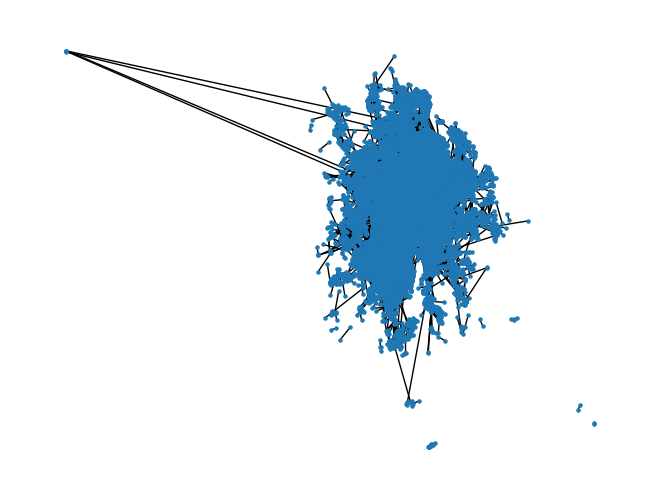

In [22]:
nx.draw(G_mobike,pos=pos_mobike,node_size=5)

## 2.2 Use network analysis on the shared bike network

In [23]:
# calculate the eigenvector_centrality

eigenvector_centrality_map = nx.algorithms.centrality.eigenvector_centrality(G_mobike,weight='weight')
# print(eigenvector_centrality_map)

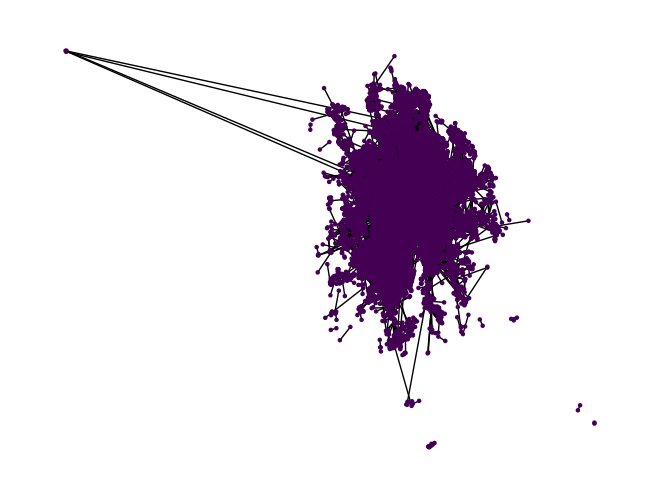

In [25]:
nx.draw(G_mobike,pos=pos_mobike,node_size=5,node_color=list(eigenvector_centrality_map.values()))

In [26]:
# all link of a graph
for link in G_mobike:
  #print(link)
  link

In [27]:
# all node importance
for k in eigenvector_centrality_map:
  if eigenvector_centrality_map[k]>=0.001:
      print('coor:',k,', eigenvector:',eigenvector_centrality_map[k])

coor: 31.20104,121.48551 , eigenvector: 0.001889034250171427
coor: 31.19673,121.48141 , eigenvector: 0.002671497856379722
coor: 31.30796,121.50381 , eigenvector: 0.001889034250171427
coor: 31.30762,121.50895 , eigenvector: 0.002671497856379722
coor: 31.17455,121.41582 , eigenvector: 0.001889034250171427
coor: 31.16936,121.41202 , eigenvector: 0.002671497856379722
coor: 31.2772,121.50575 , eigenvector: 0.002671497856379722
coor: 31.28054,121.5071 , eigenvector: 0.001889034250171427
coor: 31.23673,121.54664 , eigenvector: 0.002671497856379722
coor: 31.23219,121.53801 , eigenvector: 0.001889034250171427
coor: 31.34064,121.44937 , eigenvector: 0.001889034250171427
coor: 31.33999,121.43737 , eigenvector: 0.002671497856379722
coor: 31.23288,121.52261 , eigenvector: 0.001889034250171427
coor: 31.20091,121.46763 , eigenvector: 0.002671497856379722
coor: 31.33739,121.43528 , eigenvector: 0.001889034250171427
coor: 31.33939,121.43626 , eigenvector: 0.002671497856379722
coor: 31.24966,121.36303 ,

In [35]:
# todo: plot the data on the folium map
sh_lat = 31.22 
sh_lng = 121.46
gaode = 'http://wprd03.is.autonavi.com/appmaptile?style=7&x={x}&y={y}&z={z}' 
map_sh = folium.Map(location=[sh_lat,sh_lng],tiles=gaode, attr = 'basemap')

for k in eigenvector_centrality_map:
    lnglat = k.split(',')
    if eigenvector_centrality_map[k]>=0.001:
      folium.CircleMarker(
          [float(lnglat[0]),float(lnglat[1])],
          radius = eigenvector_centrality_map[k] * 200,
          # color = random_color(eigenvector_centrality_map[k]),
          fill=True
            ).add_to(map_sh)




In [36]:
map_sh